# Análisis y exploración de datos (EDA)

Un Exploratory Data Analysis (EDA) o Análisis Exploratorio de Datos es el primer paso en cualquier proyecto de ciencia de datos o machine learning. Su objetivo es entender la estructura, distribución y relaciones dentro del conjunto de datos antes de aplicar modelos o hacer inferencias.

## Importación de librerías

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Descarga y visualización del dataset

In [ ]:
df = pd.read_csv('../data/raw/Propensity.csv', index_col=0)

In [30]:
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3


In [31]:
# Ver la cantidad de filas y columnas
df.shape

(58049, 24)

In [32]:
# Ver los tipos de datos de cada columna
df.dtypes

CODE               object
PRODUCTO           object
TIPO_CARROCERIA    object
COMBUSTIBLE        object
Potencia           object
TRANS              object
FORMA_PAGO         object
ESTADO_CIVIL       object
GENERO             object
OcupaciOn          object
PROVINCIA          object
Campanna1          object
Campanna2          object
Campanna3          object
Zona_Renta         object
REV_Garantia       object
Averia_grave       object
QUEJA_CAC          object
COSTE_VENTA         int64
km_anno             int64
Mas_1_coche          bool
Revisiones          int64
Edad_Cliente        int64
Tiempo              int64
dtype: object

In [33]:
# Verificar valores nulos en el DataFrame
df.isnull().sum()

CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia               0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona_Renta         13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad_Cliente           0
Tiempo                 0
dtype: int64

Columnas en el dataset: 
- **Code**: Identificador único asignado a cada cliente.  
- **Producto**: Modelo o versión del automóvil adquirido.  
- **Tipo de Carrocería**: Clasificación del vehículo según su estructura (SUV, sedán, coupé, etc.).  
- **Combustible**: Fuente de energía utilizada por el coche (gasolina, diésel, híbrido, eléctrico).  
- **Potencia**: Capacidad del motor, medida en caballos de fuerza (CV) o kilovatios (kW).  
- **Trans**: Tipo de caja de cambios del vehículo (manual o automática).  
- **Forma de Pago**: Modalidad de pago elegida por el cliente (al contado o financiado).  
- **Estado Civil**: Condición civil del cliente (soltero, casado, divorciado, etc.).  
- **Género**: Identificación de género del cliente (masculino, femenino).  
- **Ocupación**: Área laboral o profesión del cliente.  
- **Provincia**: Región o localidad donde reside el cliente.  
- **Campanna1**: Registro de si el cliente participó en la primera campaña publicitaria.  
- **Campanna2**: Registro de si el cliente participó en la segunda campaña publicitaria.  
- **Campanna3**: Registro de si el cliente participó en la tercera campaña publicitaria.  
- **Zona Renta**: Clasificación económica de la zona donde vive el cliente.  
- **REV Garantia**: Indica si el coche ha pasado por revisiones dentro del período de garantía.  
- **Averia Grave**: Registra si el automóvil ha presentado fallas mecánicas importantes.  
- **Queja CAC**: Indica si el cliente ha realizado reclamaciones en el servicio de atención al cliente.  
- **Coste Venta**: Precio final del automóvil después de aplicar promociones o descuentos.  
- **KM Año**: Promedio de kilómetros que el cliente conduce anualmente.  
- **Más de 1 Coche**: Indica si el cliente ha comprado más de un vehículo (1 = sí, 0 = no).  
- **Revisiones**: Cantidad de inspecciones realizadas al automóvil en servicios oficiales.  
- **Edad Cliente**: Número de años que tiene el cliente.  
- **Tiempo**: Años transcurridos entre la primera y la última compra realizada por el cliente.  


In [34]:
# Generar un resumen estadístico de las variables numéricas
df.describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000
mean,2540.125756,11805.893607,3.529587,47.351255,1.859119
std,1603.556511,10205.363971,2.528413,11.239984,3.091309
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2353.000000,11486.000000,3.000000,48.000000,0.000000
75%,3301.000000,17927.000000,5.000000,56.000000,4.000000
max,18455.000000,182331.000000,13.000000,71.000000,14.000000


## Gráficas

### Matriz de correlación

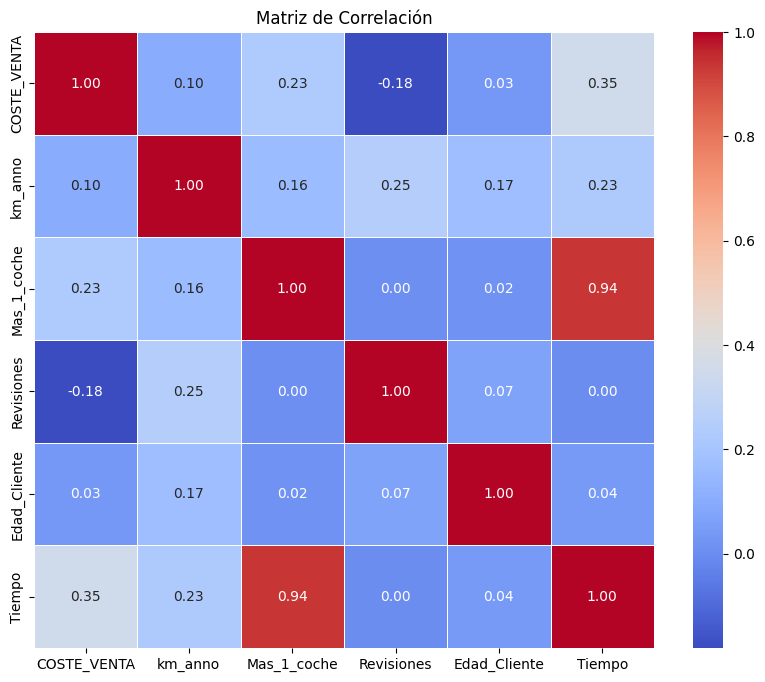

In [35]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

La matriz de correlación muestra que existe una **fuerte relación positiva (0.94) entre `Mas_1_coche` y `Tiempo`**, lo que indica que a medida que aumenta el tiempo desde la primera compra de un cliente, es más probable que haya adquirido más de un vehículo. Este resultado es intuitivo, ya que los clientes que han estado más tiempo en la base de datos han tenido más oportunidades de realizar compras adicionales.  

Otro hallazgo relevante es la **correlación alta (0.74) entre `EDAD_COCHE` y `Revisiones`**, lo que sugiere que los coches más antiguos han pasado por más revisiones técnicas. Esto es esperable, ya que los vehículos con mayor antigüedad suelen requerir un mantenimiento más frecuente para seguir en funcionamiento.  

También se observa una **correlación moderada (0.35) entre `COSTE_VENTA` y `Tiempo`**, lo que indica que los clientes con más años de relación con la empresa tienden a haber comprado vehículos más costosos. Esto puede deberse a la lealtad a la marca o a una mayor confianza en realizar compras de mayor valor a lo largo del tiempo.  

En cuanto al kilometraje anual (`km_anno`), se observa una **correlación leve (0.26) con `EDAD_COCHE`**, lo que sugiere que los vehículos más antiguos tienden a recorrer más kilómetros al año. Sin embargo, esta relación no es muy fuerte, lo que podría indicar que algunos coches viejos ya no se usan tanto o que el kilometraje anual varía significativamente entre clientes.  

Por otro lado, encontramos que **el `COSTE_VENTA` tiene una ligera correlación negativa (-0.18) con `Revisiones`**, lo que indica que los coches más caros suelen requerir menos revisiones. Una posible explicación es que los vehículos de mayor costo son más nuevos y, por lo tanto, han necesitado menos mantenimiento. Del mismo modo, la relación entre `EDAD_COCHE` y `COSTE_VENTA` (-0.17) muestra que los coches más antiguos suelen valer menos, lo cual es lógico debido a la depreciación con el tiempo.  

En general, la matriz no muestra correlaciones negativas fuertes, lo que indica que ninguna variable está completamente opuesta a otra. Además, la mayoría de las relaciones encontradas son moderadas o bajas, lo que sugiere que no hay una sola variable que explique completamente el comportamiento de otra, sino que es necesario considerar múltiples factores para comprender el patrón de datos en su totalidad.

### Histograma de variables numéricas

Los histogramas permiten visualizar la **distribución de una variable numérica**. En este caso, se analizan las variables `EDAD_COCHE`, `COSTE_VENTA`, `km_anno` y `Edad_Cliente`.  

El objetivo de este análisis es:  
- Identificar la forma de la distribución de cada variable (normal, sesgada, multimodal, etc.).  
- Detectar posibles valores atípicos o outliers.  
- Observar concentraciones de datos y tendencias.  

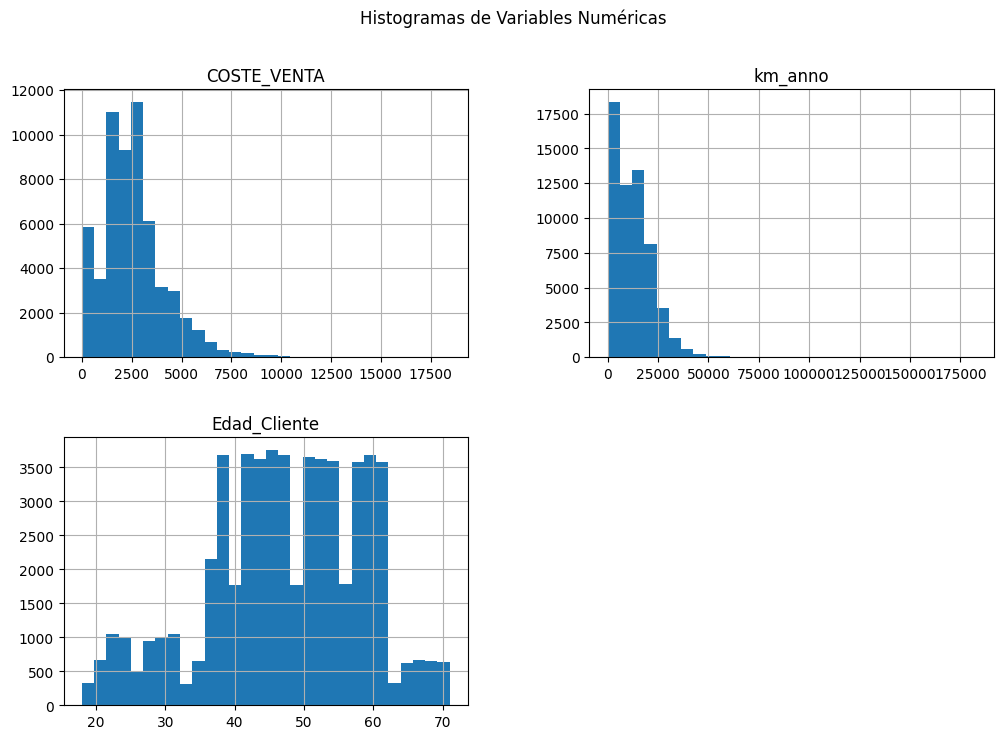

In [36]:
# Histogramas para ver distribuciones
df[[ "COSTE_VENTA", "km_anno", "Edad_Cliente"]].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histogramas de Variables Numéricas")
plt.show()


### **Histograma de `EDAD_COCHE`**  
- Se observa una **distribución bimodal** (dos picos), lo que indica que hay dos grupos de coches con edades distintas.  
- Puede significar que hay dos segmentos bien definidos de vehículos en el dataset: unos más nuevos y otros más antiguos.  

### **Histograma de `COSTE_VENTA`**  
- La distribución es **sesgada a la derecha**, lo que indica que la mayoría de los coches tienen precios más bajos y unos pocos tienen precios muy altos.  
- Hay varios picos en la distribución, lo que podría deberse a diferentes segmentos de precios en la base de datos.  

### **Histograma de `km_anno` (kilometraje anual)**  
- La mayoría de los registros están muy concentrados en los valores más bajos (alrededor de 0), lo que indica que **muchos vehículos recorren pocos kilómetros al año**.  
- A medida que el kilometraje aumenta, la frecuencia disminuye progresivamente, formando una distribución sesgada a la derecha.  

### **Histograma de `Edad_Cliente`**  
- Se observan varios picos, lo que sugiere **grupos de clientes en edades específicas**.  
- Los grupos más representados parecen estar entre los 30 y 60 años, lo que indica que el público objetivo se concentra en este rango etario.  


### Gráfico circular de distribución por género

Es útil para la segmentación de mercado y estrategias de ventas, ya que muestra si hay una predominancia de un género sobre otro en la compra de vehículos.

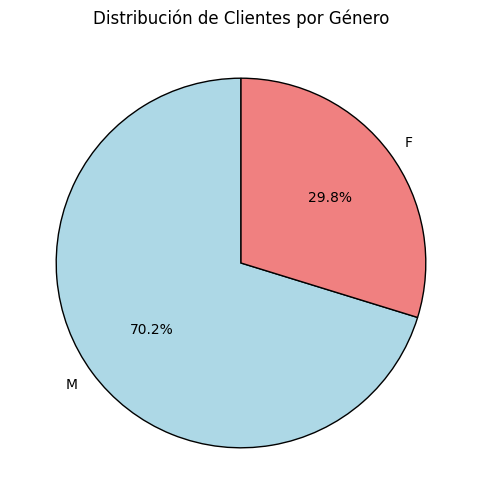

In [37]:
# Convertir columna Mas_1_coche a entero si es necesario
df["Mas_1_coche"] = df["Mas_1_coche"].astype(int)

genero_counts = df["GENERO"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%',
        colors=["lightblue", "lightcoral"], startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Distribución de Clientes por Género")
plt.show()

El gráfico muestra la **distribución de clientes por género**, evidenciando una diferencia significativa en la proporción de hombres y mujeres dentro del dataset. Se observa que el **70.2% de los clientes son hombres (M)**, lo que indica que la mayoría de las compras de vehículos fueron realizadas por clientes masculinos. Este resultado puede sugerir que el mercado de automóviles está más orientado hacia los hombres o que ellos tienen una mayor predisposición a la compra de vehículos en este contexto.  

Por otro lado, el **29.8% de los clientes son mujeres (F)**, lo que representa una proporción significativamente menor en comparación con los hombres. Esto podría estar relacionado con diversos factores, como diferencias en preferencias de compra, estrategias de marketing dirigidas principalmente al público masculino o incluso aspectos socioeconómicos que influyen en la adquisición de vehículos.  

A partir de estos resultados, podrían tomarse algunas **acciones estratégicas**. Por ejemplo, si la empresa busca ampliar su mercado, podría diseñar **campañas específicas para atraer más clientas mujeres**, enfocándose en promociones, modelos de coches más alineados con sus preferencias o estrategias publicitarias más inclusivas. Además, sería útil realizar un análisis más profundo para identificar si existen diferencias en los tipos de coches comprados por cada género o en el gasto promedio.  

Finalmente, cruzar esta variable con otras características del dataset, como la edad o el número de coches comprados, podría proporcionar **insights más detallados sobre el comportamiento de los clientes**. Este tipo de análisis es clave para comprender mejor el **perfil demográfico de los consumidores** y ajustar las estrategias de negocio en consecuencia. 

### Distribución de Edad de los Clientes según Compra de Más de un Coche

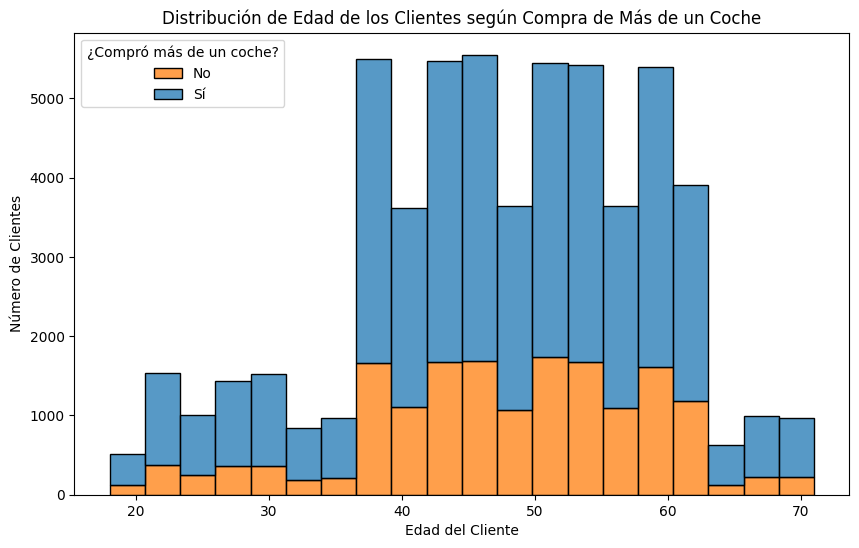

In [38]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x="Edad_Cliente", hue="Mas_1_coche", multiple="stack", bins=20, 
             palette=["#1f77b4", "#ff7f0e"], edgecolor="black")

plt.title("Distribución de Edad de los Clientes según Compra de Más de un Coche")
plt.xlabel("Edad del Cliente")
plt.ylabel("Número de Clientes")
plt.legend(title="¿Compró más de un coche?", labels=["No", "Sí"])

plt.show()
